## **Capstone MDS - RNN**

#### **_Integrantes:_**  

1. Evans Díaz   
1. Felipe Ojeda
1. Javier Cofre  
1. Luis Reinoso

In [2]:
# importar librerías
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import EngFormatter

2024-05-05 16:18:23.253228: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-05 16:18:23.253552: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-05 16:18:23.256479: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-05 16:18:23.291744: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-05 16:18:23.960364: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [3]:
# función creación matrix X & y según "lag" dado
def Matrix_X_y(df, window_size):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
    
  return np.array(X), np.array(y)

## **_1. Lectura (carga) de los Datos_**

In [4]:
# importamos archivo
df = pd.read_csv('../Data/df_final_RNN.csv')

In [5]:
# miramos el dataframe
df.head()

,year_2023,year_2024,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,CAT 798-AC,KOM-CHQ,KOM.960E5,Kom.930E-4,Kom.930E-4SE,Kom.930EN,Kom.930ER,Kom.930ER-MT,Kom.980E5,Komatsu AHS
0,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,24.0,96.0,395.0,96.0,240.0,0.0,132.0,24.0
1,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,24.0,96.0,396.0,96.0,240.0,0.0,132.0,24.0
2,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,24.0,96.0,394.0,96.0,240.0,0.0,132.0,24.0
3,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,24.0,95.0,396.0,96.0,240.0,0.0,132.0,24.0
4,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,24.0,96.0,395.0,96.0,240.0,0.0,132.0,24.0


In [6]:
# información general df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 85 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year_2023            1567 non-null   bool   
 1   year_2024            1567 non-null   bool   
 2   month_2              1567 non-null   bool   
 3   month_3              1567 non-null   bool   
 4   month_4              1567 non-null   bool   
 5   month_5              1567 non-null   bool   
 6   month_6              1567 non-null   bool   
 7   month_7              1567 non-null   bool   
 8   month_8              1567 non-null   bool   
 9   month_9              1567 non-null   bool   
 10  month_10             1567 non-null   bool   
 11  month_11             1567 non-null   bool   
 12  month_12             1567 non-null   bool   
 13  day_2                1567 non-null   bool   
 14  day_3                1567 non-null   bool   
 15  day_4                1567 non-null   b

## **_2 Preparación del DataFrame_**

### _2.1. Definición Variables Categóricas_

In [7]:
# transformamos las variables bool a categorical y le asignamos 0 o 1
for col in df.columns:
  if df[col].dtype == 'bool':
     df[col] = df[col].astype('category').cat.codes
     df[col] = df[col].astype('category') # para que quede como category y no como int8

In [8]:
print('Nombre Columnas: ',df.columns)
print('Cantidad Columnas: ',len(df.columns))

Nombre Columnas:  Index(['year_2023', 'year_2024', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7',
       'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13', 'day_14',
       'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'day_20', 'day_21',
       'day_22', 'day_23', 'day_24', 'day_25', 'day_26', 'day_27', 'day_28',
       'day_29', 'day_30', 'day_31', 'shift_B', 'crew_E2', 'crew_E3',
       'crew_E4', 'total', 'efectivo', 'mantencion', 'mecanica', 'electrica',
       'mant_excl', 'mec_excl', 'elec_excl', 'som_excl', 'demora', 'r_prog',
       'r_noprg', 'waiting', 'queued', 'material_tonnage', 'payload',
       'distance', 'distance_down', 'distance_down_level', 'distance_up',
       'distance_up_level', 'expected_time', 'lift_down', 'lift_down_level',
       'lift_up', 'lift_up_level', 'travel_time', 'CAT 797-F', 'CAT 798-AC',
     

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 85 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   year_2023            1567 non-null   category
 1   year_2024            1567 non-null   category
 2   month_2              1567 non-null   category
 3   month_3              1567 non-null   category
 4   month_4              1567 non-null   category
 5   month_5              1567 non-null   category
 6   month_6              1567 non-null   category
 7   month_7              1567 non-null   category
 8   month_8              1567 non-null   category
 9   month_9              1567 non-null   category
 10  month_10             1567 non-null   category
 11  month_11             1567 non-null   category
 12  month_12             1567 non-null   category
 13  day_2                1567 non-null   category
 14  day_3                1567 non-null   category
 15  day_4                

### _2.2 Estandarización de Variables Numéricas_

In [10]:
# estandarizamos las variables numéricas
col_num = df.select_dtypes(include=['float64','int64']).columns

scaler = StandardScaler()
df[col_num] = scaler.fit_transform(df[col_num])

In [11]:
df[col_num]

,total,efectivo,mantencion,mecanica,electrica,mant_excl,mec_excl,elec_excl,som_excl,demora,...,CAT 798-AC,KOM-CHQ,KOM.960E5,Kom.930E-4,Kom.930E-4SE,Kom.930EN,Kom.930ER,Kom.930ER-MT,Kom.980E5,Komatsu AHS
0,-2.655292,-0.004485,-0.285657,-1.862441,-0.721030,0.070456,-0.494502,-0.383416,-0.542790,1.501190,...,-0.213340,-0.575556,2.735792,0.191462,0.563663,2.277691,0.101727,-0.035749,-2.981670,-0.101592
1,-2.609231,-0.150119,0.267412,-2.068534,-0.302548,-0.275540,-0.163688,-0.657358,0.012994,0.821500,...,-0.213340,-0.575556,2.735792,0.191462,0.607062,2.277691,0.101727,-0.035749,-2.981670,-0.101592
2,-2.701353,-0.870796,0.905168,-2.187625,-0.983502,-0.397226,-0.144525,1.613826,0.215479,1.554988,...,-0.213340,-0.575556,2.735792,0.191462,0.520264,2.277691,0.101727,-0.035749,-2.981670,-0.101592
3,-2.655292,-0.384935,0.595569,-2.238718,0.221161,-0.751238,-0.351754,0.305468,0.260929,0.023847,...,-0.213340,-0.575556,2.735792,-1.756724,0.607062,2.277691,0.101727,-0.035749,-2.981670,-0.101592
4,-2.655292,-0.347492,0.595011,-2.393621,-0.962720,0.281214,-0.373091,0.436407,0.515131,0.860647,...,-0.213340,-0.575556,2.735792,0.191462,0.563663,2.277691,0.101727,-0.035749,-2.981670,-0.101592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,0.661092,0.902508,0.325973,0.473747,-0.303865,-1.240633,-0.995820,-0.657358,-0.375358,-0.318173,...,4.999982,-0.575556,-0.505479,0.191462,1.127852,-0.485337,0.101727,-0.035749,0.345965,-1.147779
1563,-0.444369,0.652524,-0.412607,0.489265,0.106798,-0.174357,-0.796527,2.080902,-0.906260,0.727924,...,4.999982,-0.575556,-0.505479,0.191462,1.084453,-1.176095,-9.913288,-0.035749,0.345965,-1.147779
1564,-0.398308,0.981398,0.380470,0.218474,0.274866,0.098628,-0.863005,0.359177,-0.988625,-0.554423,...,4.999982,-0.575556,-0.505479,0.191462,1.127852,-1.176095,-9.913288,-0.035749,0.345965,-1.147779
1565,-0.444369,0.731425,0.957582,0.423084,-0.356006,0.243151,-0.637886,0.065837,-1.484020,0.099858,...,4.999982,-0.575556,-0.505479,0.191462,1.127852,-1.176095,-9.913288,-0.035749,0.345965,-1.147779


In [12]:
# dejo la variable objetivo en la primera columna
columnas_sin_target = df.drop(['payload'], axis=1).columns.tolist()
df = df[['payload'] + columnas_sin_target]
df

,payload,year_2023,year_2024,month_2,month_3,month_4,month_5,month_6,month_7,month_8,...,CAT 798-AC,KOM-CHQ,KOM.960E5,Kom.930E-4,Kom.930E-4SE,Kom.930EN,Kom.930ER,Kom.930ER-MT,Kom.980E5,Komatsu AHS
0,2.694037,0,0,0,0,0,0,0,0,0,...,-0.213340,-0.575556,2.735792,0.191462,0.563663,2.277691,0.101727,-0.035749,-2.981670,-0.101592
1,2.411105,0,0,0,0,0,0,0,0,0,...,-0.213340,-0.575556,2.735792,0.191462,0.607062,2.277691,0.101727,-0.035749,-2.981670,-0.101592
2,2.034113,0,0,0,0,0,0,0,0,0,...,-0.213340,-0.575556,2.735792,0.191462,0.520264,2.277691,0.101727,-0.035749,-2.981670,-0.101592
3,1.779473,0,0,0,0,0,0,0,0,0,...,-0.213340,-0.575556,2.735792,-1.756724,0.607062,2.277691,0.101727,-0.035749,-2.981670,-0.101592
4,2.115702,0,0,0,0,0,0,0,0,0,...,-0.213340,-0.575556,2.735792,0.191462,0.563663,2.277691,0.101727,-0.035749,-2.981670,-0.101592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,-1.117204,0,1,1,0,0,0,0,0,0,...,4.999982,-0.575556,-0.505479,0.191462,1.127852,-0.485337,0.101727,-0.035749,0.345965,-1.147779
1563,-1.339841,0,1,1,0,0,0,0,0,0,...,4.999982,-0.575556,-0.505479,0.191462,1.084453,-1.176095,-9.913288,-0.035749,0.345965,-1.147779
1564,-1.618469,0,1,1,0,0,0,0,0,0,...,4.999982,-0.575556,-0.505479,0.191462,1.127852,-1.176095,-9.913288,-0.035749,0.345965,-1.147779
1565,-0.629214,0,1,1,0,0,0,0,0,0,...,4.999982,-0.575556,-0.505479,0.191462,1.127852,-1.176095,-9.913288,-0.035749,0.345965,-1.147779


### _2.3 Selección de Variables - Lasso_

> Se toman las variables que habíamos seleccionado en el notebook de Lasso.

In [13]:
df_filtrado = df.copy()

In [11]:
# seleccionamos las columnas que vamos a usar para el modelo
columnas = ['payload','year_2023', 'month_3', 'month_6', 'month_7', 'month_8', 'month_10',
       'shift_B', 'crew_E2', 'crew_E4', 'distance', 'distance_down_level',
       'distance_up_level', 'lift_down', 'efectivo', 'mecanica',
       'electrica', 'mant_excl', 'mec_excl', 'som_excl',
       'r_prog', 'waiting', 'queued', 'material_tonnage',
       'payload', 'expected_time', 'CAT 797-F', 'Kom.930E-4',
       'Kom.930ER']
df_filtrado = df[columnas].copy()

### _2.4 Generación de Matrices X & y para RNN_

In [14]:
# definimos la ventana del lag (L)
window_size = 14
# llamamos a la función para crear la matriz X & y
X, y = Matrix_X_y(df_filtrado, window_size)
X.shape, y.shape

((1553, 14, 85), (1553,))

In [15]:
# miramos X
X

array([[[ 2.69403692,  0.        ,  0.        , ..., -0.0357485 ,
         -2.98167027, -0.10159203],
        [ 2.41110496,  0.        ,  0.        , ..., -0.0357485 ,
         -2.98167027, -0.10159203],
        [ 2.03411307,  0.        ,  0.        , ..., -0.0357485 ,
         -2.98167027, -0.10159203],
        ...,
        [-1.02253639,  0.        ,  0.        , ..., -0.0357485 ,
         -2.98167027, -0.10159203],
        [-0.38957016,  0.        ,  0.        , ..., -0.0357485 ,
         -2.98167027, -0.10159203],
        [ 1.85193434,  0.        ,  0.        , ..., -0.0357485 ,
         -2.98167027, -0.10159203]],

       [[ 2.41110496,  0.        ,  0.        , ..., -0.0357485 ,
         -2.98167027, -0.10159203],
        [ 2.03411307,  0.        ,  0.        , ..., -0.0357485 ,
         -2.98167027, -0.10159203],
        [ 1.77947333,  0.        ,  0.        , ..., -0.0357485 ,
         -2.98167027, -0.10159203],
        ...,
        [-0.38957016,  0.        ,  0.        , ..., -

In [16]:
# miramos y
y

array([ 1.73289519,  2.10807827,  1.76741861, ..., -1.61846894,
       -0.62921389, -0.67916419])

In [17]:
X_train, y_train = X[:867], y[:867]
X_val, y_val = X[867:975], y[867:975]
X_test, y_test = X[975:], y[975:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((867, 14, 85), (867,), (108, 14, 85), (108,), (578, 14, 85), (578,))

## **_3 RNN_**

In [18]:
# librerias para RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, SimpleRNN, Dense, Dropout, LSTM, GRU
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

### _3.1 Simple RNN_

In [19]:
# generalización del modelo
model1 = Sequential()
model1.add(InputLayer(input_shape=(window_size, X.shape[2])))  
model1.add(SimpleRNN(64))
model1.add(Dense(1, activation='linear'))  

model1.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])  
history1 = model1.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/20


/home/evansdl/miniconda3/envs/py312/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
2024-05-05 16:23:22.738555: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-05 16:23:22.739057: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.8689 - mae: 0.7353 - val_loss: 0.3977 - val_mae: 0.4969
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4624 - mae: 0.5275 - val_loss: 0.3751 - val_mae: 0.4836
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3618 - mae: 0.4716 - val_loss: 0.3900 - val_mae: 0.4924
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3158 - mae: 0.4480 - val_loss: 0.3838 - val_mae: 0.4887
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2967 - mae: 0.4213 - val_loss: 0.3500 - val_mae: 0.4603
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2589 - mae: 0.4074 - val_loss: 0.3622 - val_mae: 0.4692
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2473 - mae: 0.3880 - val_loss: 0.3658 - val_mae: 0.4743
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2185 - mae: 0.3644 - val_loss: 0.3789 - val_mae: 0.4793
Epoch 9/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2019 - mae: 0.3531 - va

In [20]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Train Predictions,Actuals
0,1.717397,1.732895
1,2.064731,2.108078
2,1.515514,1.767419
3,1.738456,1.866855
4,1.927822,1.910518
...,...,...
862,-0.345811,-0.531874
863,-0.093197,-0.055805
864,-0.581142,-0.588352
865,0.252570,0.211065


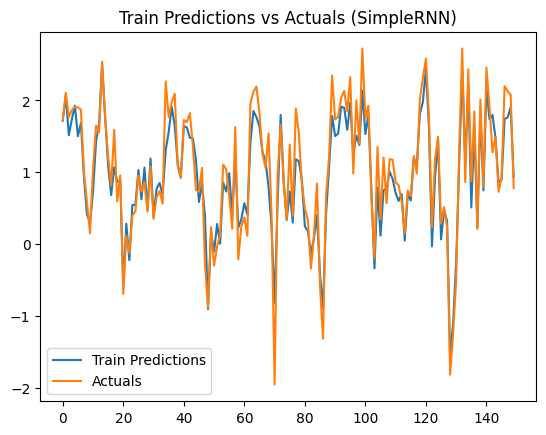

In [21]:
plt.plot(train_results['Train Predictions'][:150])
plt.plot(train_results['Actuals'][:150])

plt.title('Train Predictions vs Actuals (SimpleRNN)')
plt.legend(['Train Predictions', 'Actuals'])
plt.show()

In [22]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step


,Test Predictions,Actuals
0,-0.734549,-0.965185
1,0.432467,-0.681134
2,-1.921842,-0.060760
3,-1.228491,-0.676653
4,-1.633150,-0.696388
...,...,...
573,0.205754,-1.117204
574,-0.390910,-1.339841
575,-0.592180,-1.618469
576,-0.196401,-0.629214


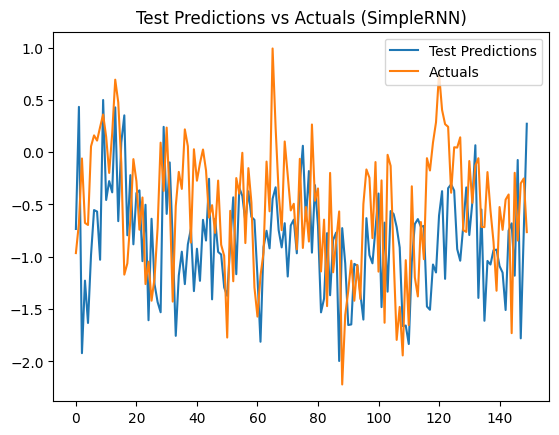

In [23]:
plt.plot(test_results['Test Predictions'][:150])
plt.plot(test_results['Actuals'][:150])

plt.title('Test Predictions vs Actuals (SimpleRNN)')
plt.legend(['Test Predictions', 'Actuals'])
plt.show()

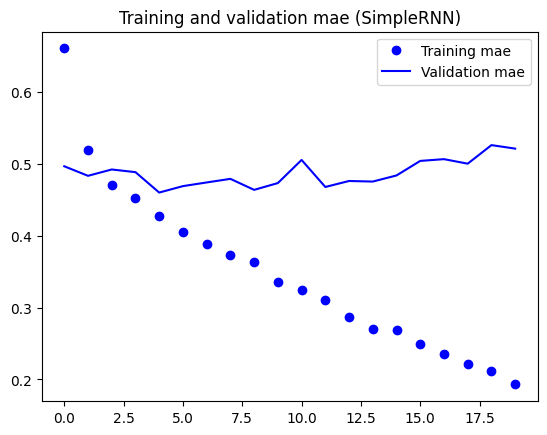

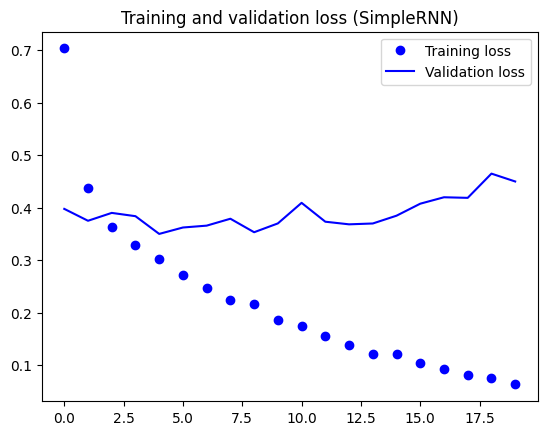

In [24]:
mae = history1.history['mae']
val_mae = history1.history['val_mae']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(mae))

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae (SimpleRNN)')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss (SimpleRNN)')
plt.legend()

plt.show()

### _3.2 LSTM_

In [25]:
# generalización del modelo
model2 = Sequential()
model2.add(InputLayer(input_shape=(window_size, X.shape[2])))  
model2.add(LSTM(64))
model2.add(Dense(1, activation='linear'))  

model2.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])  
history2 = model2.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/20


/home/evansdl/miniconda3/envs/py312/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.9098 - mae: 0.7448 - val_loss: 0.4617 - val_mae: 0.5453
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4678 - mae: 0.5309 - val_loss: 0.4486 - val_mae: 0.5389
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3772 - mae: 0.4822 - val_loss: 0.4758 - val_mae: 0.5543
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3784 - mae: 0.4789 - val_loss: 0.4565 - val_mae: 0.5354
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2906 - mae: 0.4248 - val_loss: 0.5107 - val_mae: 0.5687
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2993 - mae: 0.4319 - val_loss: 0.4383 - val_mae: 0.5186
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3109 - mae: 0.4406 - val_loss: 0.5280 - val_mae: 0.5748
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2632 - mae: 0.4049 - val_loss: 0.5040 - val_mae: 0.5573
Epoch 9/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2525 - mae: 0.3948 - va

In [26]:
train_predictions = model2.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


,Train Predictions,Actuals
0,1.675829,1.732895
1,1.864944,2.108078
2,1.850553,1.767419
3,1.894438,1.866855
4,2.076579,1.910518
...,...,...
862,-0.148270,-0.531874
863,-0.182973,-0.055805
864,-0.177364,-0.588352
865,0.321769,0.211065


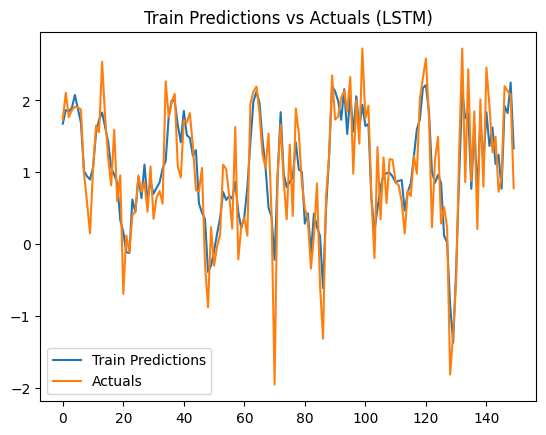

In [27]:
plt.plot(train_results['Train Predictions'][:150])
plt.plot(train_results['Actuals'][:150])

plt.title('Train Predictions vs Actuals (LSTM)')
plt.legend(['Train Predictions', 'Actuals'])
plt.show()

In [28]:
test_predictions = model2.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Test Predictions,Actuals
0,0.073981,-0.965185
1,-0.531333,-0.681134
2,-0.428230,-0.060760
3,-0.825547,-0.676653
4,-0.773212,-0.696388
...,...,...
573,-0.240022,-1.117204
574,-0.185706,-1.339841
575,0.179223,-1.618469
576,0.150029,-0.629214


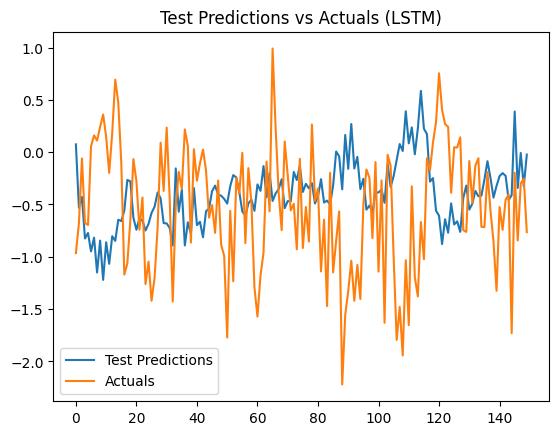

In [29]:
plt.plot(test_results['Test Predictions'][:150])
plt.plot(test_results['Actuals'][:150])

plt.title('Test Predictions vs Actuals (LSTM)')
plt.legend(['Test Predictions', 'Actuals'])
plt.show()

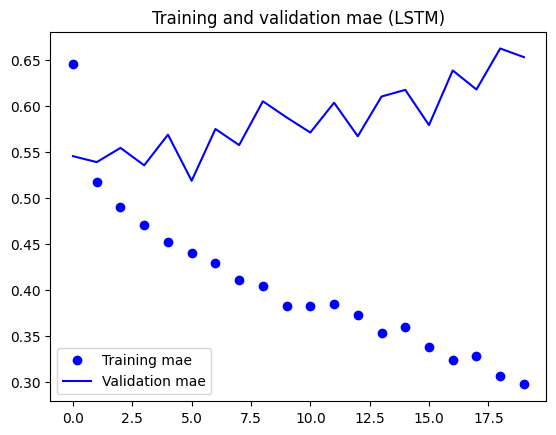

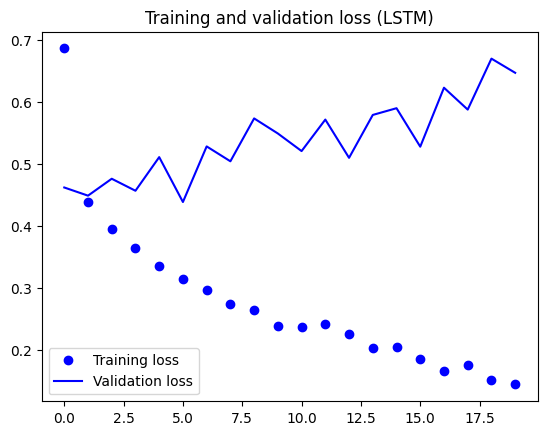

In [30]:
mae = history2.history['mae']
val_mae = history2.history['val_mae']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(mae))

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae (LSTM)')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss (LSTM)')
plt.legend()

plt.show()

### _3.3 Simple RNN + Dropout_

In [31]:
# generalización del modelo
model3 = Sequential()
model3.add(InputLayer(input_shape=(window_size, X.shape[2])))  
model3.add(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.5))
model3.add(Dense(1, activation='linear'))  

model3.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])  
history3 = model3.fit(X_train, y_train,
                    epochs=40,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/40


/home/evansdl/miniconda3/envs/py312/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.6954 - mae: 1.0166 - val_loss: 0.5548 - val_mae: 0.5844
Epoch 2/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8801 - mae: 0.7234 - val_loss: 0.4780 - val_mae: 0.5363
Epoch 3/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7081 - mae: 0.6690 - val_loss: 0.4418 - val_mae: 0.5124
Epoch 4/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5664 - mae: 0.6078 - val_loss: 0.4263 - val_mae: 0.4949
Epoch 5/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5778 - mae: 0.5974 - val_loss: 0.4263 - val_mae: 0.4990
Epoch 6/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5601 - mae: 0.5806 - val_loss: 0.4237 - val_mae: 0.4999
Epoch 7/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4523 - mae: 0.5303 - val_loss: 0.4395 - val_mae: 0.5099
Epoch 8/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4975 - mae: 0.5510 - val_loss: 0.4241 - val_mae: 0.4970
Epoch 9/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5148 - mae: 0.5674 - va

In [32]:
train_predictions = model3.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


,Train Predictions,Actuals
0,1.551150,1.732895
1,1.528479,2.108078
2,1.667515,1.767419
3,1.602360,1.866855
4,1.755280,1.910518
...,...,...
862,-0.638220,-0.531874
863,-0.313510,-0.055805
864,-0.517863,-0.588352
865,-0.461361,0.211065


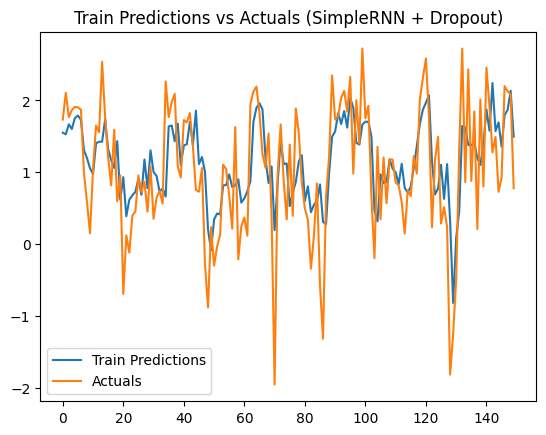

In [33]:
plt.plot(train_results['Train Predictions'][:150])
plt.plot(train_results['Actuals'][:150])

plt.title('Train Predictions vs Actuals (SimpleRNN + Dropout)')
plt.legend(['Train Predictions', 'Actuals'])
plt.show()

In [34]:
test_predictions = model3.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Test Predictions,Actuals
0,-1.303147,-0.965185
1,-1.007991,-0.681134
2,-0.856331,-0.060760
3,-0.509795,-0.676653
4,-0.811866,-0.696388
...,...,...
573,-0.986215,-1.117204
574,-1.175739,-1.339841
575,-1.134070,-1.618469
576,-1.463498,-0.629214


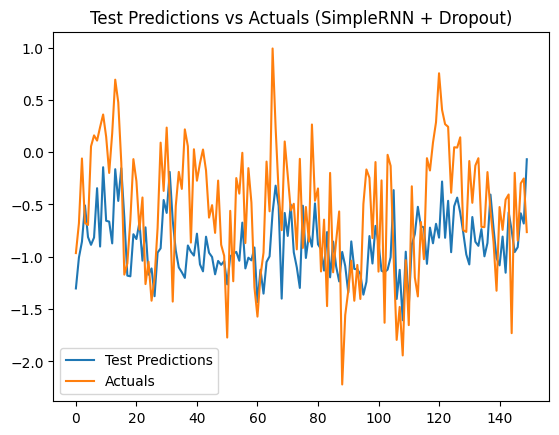

In [35]:
plt.plot(test_results['Test Predictions'][:150])
plt.plot(test_results['Actuals'][:150])

plt.title('Test Predictions vs Actuals (SimpleRNN + Dropout)')
plt.legend(['Test Predictions', 'Actuals'])
plt.show()

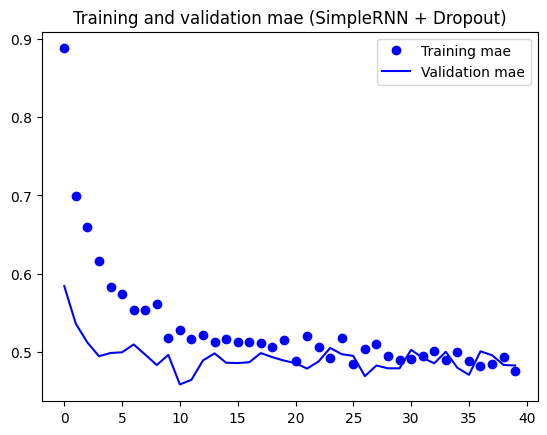

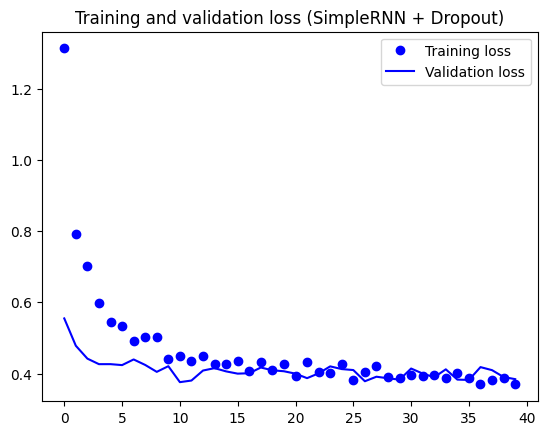

In [36]:
mae = history3.history['mae']
val_mae = history3.history['val_mae']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(mae))

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae (SimpleRNN + Dropout)')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss (SimpleRNN + Dropout)')
plt.legend()

plt.show()

### _3.4 Simple RNN + Dropout + Capas Recurrentes_

In [37]:
# generalización del modelo
model4 = Sequential()
model4.add(InputLayer(input_shape=(window_size, X.shape[2])))  
model4.add(SimpleRNN(96, dropout=0.2, recurrent_dropout=0.5, return_sequences=True))
model4.add(SimpleRNN(96, dropout=0.2, recurrent_dropout=0.5, return_sequences=True))
model4.add(SimpleRNN(96, dropout=0.2, recurrent_dropout=0.5))
model4.add(Dense(1, activation='linear'))  

model4.summary()

/home/evansdl/miniconda3/envs/py312/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 14, 96)         │        17,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 14, 96)         │        18,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 96)             │        18,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,625 (213.38 KB)

 Trainable params: 54,625 (213.38 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# ajustamos el modelo
model4.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])  
history4 = model4.fit(X_train, y_train,
                    epochs=40,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.6196 - mae: 1.0361 - val_loss: 0.7813 - val_mae: 0.7318
Epoch 2/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0518 - mae: 0.8202 - val_loss: 0.5991 - val_mae: 0.6420
Epoch 3/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8626 - mae: 0.7404 - val_loss: 0.5844 - val_mae: 0.6330
Epoch 4/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7891 - mae: 0.7220 - val_loss: 0.4502 - val_mae: 0.5493
Epoch 5/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7012 - mae: 0.6607 - val_loss: 0.4481 - val_mae: 0.5559
Epoch 6/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7207 - mae: 0.6783 - val_loss: 0.4338 - val_mae: 0.5469
Epoch 7/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7002 - mae: 0.6680 - val_loss: 0.5374 - val_mae: 0.6025
Epoch 8/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6696 - mae: 0.6458 - val_loss: 0.4543 - val_mae: 0.5481
Epoch 9/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6558 - mae:

In [39]:
train_predictions = model4.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


,Train Predictions,Actuals
0,1.829226,1.732895
1,1.902868,2.108078
2,1.956305,1.767419
3,1.956740,1.866855
4,1.979502,1.910518
...,...,...
862,-1.060949,-0.531874
863,-0.771835,-0.055805
864,-1.106770,-0.588352
865,-0.722611,0.211065


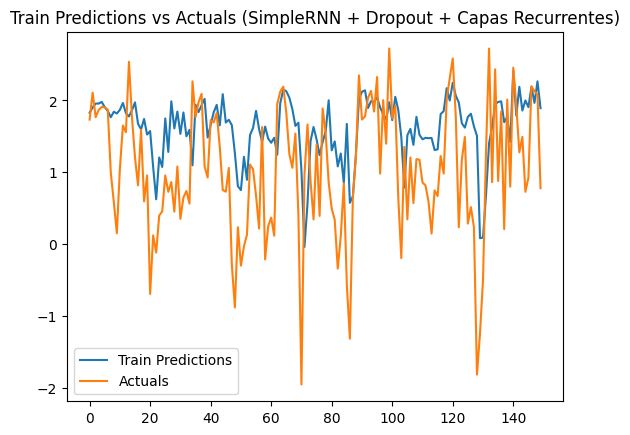

In [40]:
plt.plot(train_results['Train Predictions'][:150])
plt.plot(train_results['Actuals'][:150])

plt.title('Train Predictions vs Actuals (SimpleRNN + Dropout + Capas Recurrentes)')
plt.legend(['Train Predictions', 'Actuals'])
plt.show()

In [41]:
test_predictions = model4.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Test Predictions,Actuals
0,-0.402525,-0.965185
1,0.037233,-0.681134
2,-1.188085,-0.060760
3,-0.432638,-0.676653
4,-1.520433,-0.696388
...,...,...
573,-0.351133,-1.117204
574,-0.512152,-1.339841
575,-0.059237,-1.618469
576,-0.418450,-0.629214


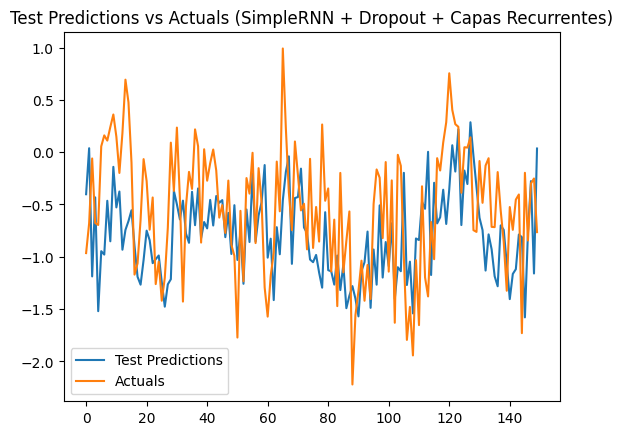

In [42]:
plt.plot(test_results['Test Predictions'][:150])
plt.plot(test_results['Actuals'][:150])

plt.title('Test Predictions vs Actuals (SimpleRNN + Dropout + Capas Recurrentes)')
plt.legend(['Test Predictions', 'Actuals'])
plt.show()

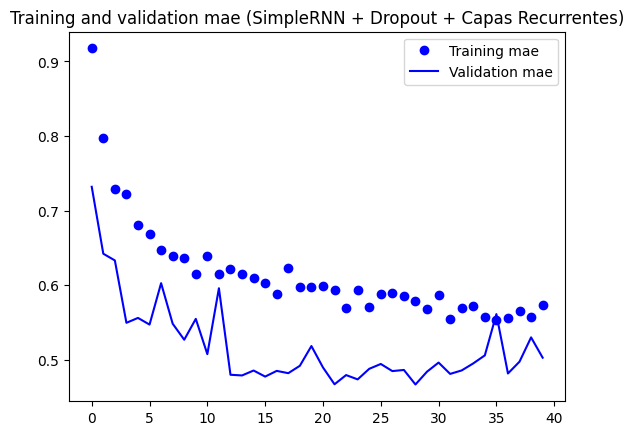

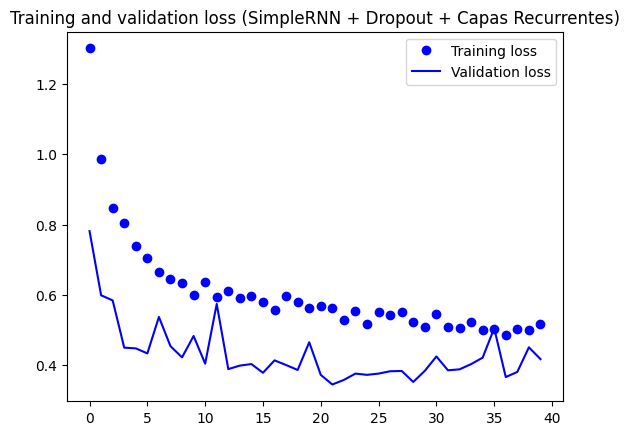

In [43]:
mae = history4.history['mae']
val_mae = history4.history['val_mae']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(len(mae))

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae (SimpleRNN + Dropout + Capas Recurrentes)')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss (SimpleRNN + Dropout + Capas Recurrentes)')
plt.legend()

plt.show()